## Step 1: Data Loading and getting insights

In [8]:
import pandas as pd
df = pd.read_json('data.json')
df.head()

# df_train = pd.read_csv('train.csv') ## training Data
# df_test = pd.read_csv('test.csv') ## testing Data
# df_train.head(n=5)

,disease,doctor_health_id,doctor_name,entry_date,hospital_name,id,medication,patient_health_id,patient_name,region,status
0,Colds,D-911100013,Aidan Jensen,"Mar 4, 2021",HOSMAT Hospital,0,Venlafaxine HCl ER,P-911100012,Kathleen Lata,Shillong,Recovering
1,Colds and Flu.,D-91110005,Regan Pierce,"Mar 4, 2021",Kanpur Medical Center,1,Metformin HCl,P-911100015,Giselle Chaudhary,Pondicherry,Recovering
2,Conjunctivitis,D-91110001,Shellie William,"Nov 23, 2020",Apex Hospitals,2,Klor-Con M20,P-91110002,Mannix Rai,Delhi,Recovered
3,Allergies,D-911100015,Emerson Dudley,"Sep 18, 2021",Aditya Hospitals,3,Venlafaxine HCl ER,P-91110006,Rhea Prasad,Kohima,Passed Away
4,Diarrhea,D-911100012,Graham Vang,"Jul 6, 2021",Bombay Hospital,4,Metformin HCl,P-91110007,Raja Saini,Tiruvottiyur,Passed Away


## Data Analysis: Finding Overall recovery Rate

In [9]:
def count(li, value):
    cnt = 0
    for item in li :
        cnt+= 1 if item==value else 0
    return cnt

['Recovering', 'Recovered', 'Passed Away']
[336, 355, 309]


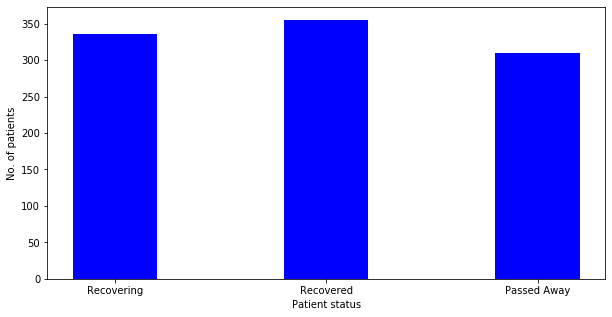

In [12]:
import numpy as np
import matplotlib.pyplot as plt
status = list(set(df["status"]))
values = [ count(df["status"], x) for x in status]
print(status)  
print(values)  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(status, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Patient status")
plt.ylabel("No. of patients")
plt.show()

In [16]:
num = values[0] + values[1]
deno = values[0] + values[1] + values[2]
recoveryRate = num/deno
print("Overall Recovery Rate: ", recoveryRate*100, '%')

Overall Recovery Rate:  69.1 %


## Data Analysis: Hospital wise Patients Admitted

In [30]:
def countPatientInHospital(df, hospital):
    cnt = 0;
    for index, row in df.iterrows():
        cnt += 1 if row["hospital_name"]==hospital else 0
    return cnt

['Aditya Hospitals', 'Amit Jaggi Memorial Hospital', 'Apex Hospitals', 'Kanpur Medical Center', 'Amar Leela Hospital', 'Amit Jaggi Center', 'HOSMAT Hospital', 'Bombay Hospital', 'Yashoda Super Center', 'Manipal Hospital']
[54, 61, 233, 168, 49, 110, 94, 64, 60, 107]


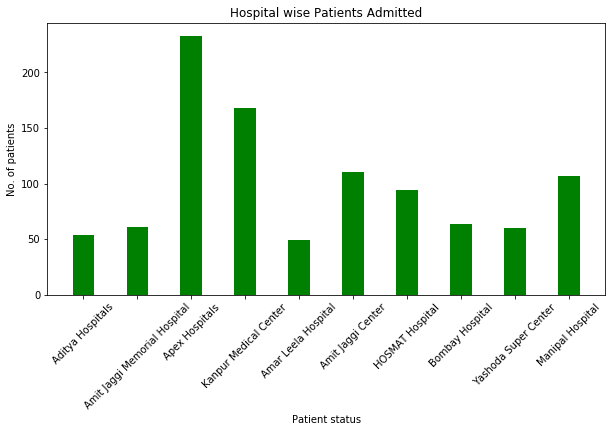

In [32]:
import numpy as np
import matplotlib.pyplot as plt
hosp = list(set(df["hospital_name"]))
values = [ countPatientInHospital(df, x) for x in hosp]
print(hosp)  
print(values)  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(hosp, values, color ='green',
        width = 0.4)
plt.xticks(rotation=45)
plt.title("Hospital wise Patients Admitted")
plt.xlabel("Patient status")
plt.ylabel("No. of patients")
plt.show()
